In [1]:
from __future__ import division
import tqdm
import os
import sys
sys.path.append('/mnt/disk0/home/jianwei_leejw/scripts/TESPulseFitCode')
# sys.path.append('/workspace/projects/TES/scripts')
import numpy as np
import matplotlib
# matplotlib.use('nbAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import glob
from lmfit import Model, Parameters
# import seaborn
import pickle

import pulse_utils as pu
import discriminator as disc
import discriminator_edges as disc_edges
import trace_param as trcp
import pulse_fit_powell as pfp
import pulse_fit_bulk_process as pfbulk

In [2]:
results_directory = './'

In [3]:
# Loads Trace Parameters
[height_th, offset] = np.loadtxt(results_directory + 'disc_settings.dat')
offset = int(offset)
print height_th, offset

0.00794093643656 650


In [4]:
sigma0 = np.loadtxt(results_directory + 'rms.dat')
print sigma0

0.00180058629476


In [5]:
# Loads Pulse (fitting) Parameters
pulse_params =np.genfromtxt(results_directory + 'sum_and_diff_fit_params.dat',
                            delimiter="\t",
                            )
print pulse_params

[  1.41215309   1.96201152   2.38027426  18.9113961   -0.48406059
   0.48406059  18.9113961 ]


In [6]:
# Loads Two Photon Model
pkl_file = open(results_directory + 'two_pulse_fit_model.dat', 'rb')
two_pulse_fit = pickle.load(pkl_file)

In [7]:
# imports Two Photon filelist
tasks = np.genfromtxt(results_directory + 'filelist_two_photon.dat', delimiter=',',dtype='string')
# tasks = np.genfromtxt(results_directory + 'filelist_13.dat', delimiter=',',dtype='string')
print len(tasks)

10706


[[Model]]
    (Model(one_pulse, prefix='one_') + Model(one_pulse, prefix='two_'))
[[Variables]]
    one_x_offset:      3.0735e-06 (init= 3.041253e-06)
    two_x_offset:      3.2956e-06 (init= 3.757253e-06)
    sum_amplitudes:    2.06701927 (init= 1.981632)
    diff_amplitudes:  -0.24712472 (init= 0)
    one_amplitude:     0.90994727  == '(sum_amplitudes + diff_amplitudes)/2'
    two_amplitude:     1.15707199  == '(sum_amplitudes - diff_amplitudes)/2'



(0, 0.035191288625774066)

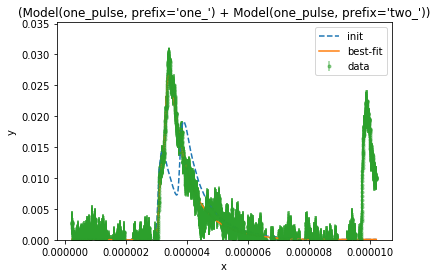

In [8]:
# tests fit for one interesting plot
reload(pfp)
fl = np.genfromtxt('/mnt/disk1/analysis/20170523_TES5_75mK_95uA_trise_115ns_results/interesting_traces_220_to_240ns.txt', delimiter='\n',dtype='string')
fname = fl[8]
# fname = '/mnt/disk1/data/20170523_TES5_75mK_95uA_trise_115ns/doubles/C2doubles10627.trc'
time = pu.time_vector(fname)
signal = trcp.trace_extr(fname,height_th)
r = pfp.fit_two_cw(time,signal,
              two_pulse_fit,
              pulse_params,
              height_th,
              sigma0)
r.plot_fit(data_kws={'marker':'.','alpha':0.5})
print r.fit_report()
plt.ylim(0,np.max(signal)*1.2)

In [9]:
# lmfit (multiprocess) traces
cores = 23
reload(pfbulk)
reload(pfp)
pfbulk.run_fit_two_poolable(
    results_directory+\
    'results_newdisc_fixed_again_with_offset_extended_rejection.csv',
    cores,
    tasks,
    two_pulse_fit, pulse_params, height_th, sigma0)